Using Selenium, scrape through all of the instagram accounts tagged in the event description, and obtain the # of followers they have. Although this is a current number it's safe to assume that that number was always this high for the period of engagement observations. 

In [1]:
from selenium import webdriver
from time import sleep
from random import randint
import pandas as pd


/Users/noahkasmanoff/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [1]:
## Code to scrape instagram profile data, and see if a tagged profile's "star power", i.e follower count, can help 
#serve as an indicator of how popular an NBA post will be. 


from selenium import webdriver
from time import sleep
from random import randint
import pandas as pd



/Users/noahkasmanoff/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
profile_df = pd.read_csv('Business Analytics/profile_df.csv') #load in dataset of all people tagged in an nba post, 

In [3]:
profile_df

,avg_eng,cluster,max_eng,min_eng,n_posts,profile,tot_eng,var_eng,Star?
0,484883.253521,0.539906,848228,198217,213,@raptors,103280133,166178.015873,0
1,541361.461538,0.692308,848228,127816,13,@sergeibaka,7037699,181581.297429,0
2,633178.625000,1.000000,723934,502093,8,@normanpowell4,5065429,83453.207631,0
3,601731.142857,1.000000,696478,502093,7,@fredvanvleet,4212118,68670.125881,0
4,587078.422222,0.844444,854893,280401,45,@kyle_lowry7,26418529,130775.656065,0
5,569430.888889,0.888889,706452,154757,9,@k_mid22,5124878,162026.064528,0
6,487691.492147,0.544503,810070,217833,191,@bucks,93149075,155108.514210,0
7,628543.834197,0.891192,956368,253363,193,@giannis_an34,121308960,123631.732902,0
8,603939.379310,0.850575,941443,304981,87,@lukadoncic,52542726,131724.565217,1
9,616215.732143,0.857143,898784,287156,56,@traeyoung,34508081,115901.119416,0


In [3]:
#code to obtain this will be cleaned as well. 
driver = webdriver.Chrome('/Users/noahkasmanoff/Desktop/chromedriver') #open up chrome/spotify


def make_num(z):
    """
    """
    try:
        z = z.split()[0] #not the followers part
        num = re.split(r'[a-z]*',z)[0]
        order = "".join(re.findall(r'[a-z]*',z))
        if order == 'm':
            num = float(num) * 1e6
        if order == 'k':
            num = float(num) * 1e3
        else:
            num = float(num)
        return num
    except:
        pass

def get_followers(z):
    """
    """
    url =  driver.get("https://www.instagram.com/"+ z + "/?hl=en")
    sleep(randint(1,3))
    hrefs_in_view = driver.find_elements_by_tag_name('a')
    for elem in hrefs_in_view:
        if elem.get_attribute('href') ==  "https://www.instagram.com/accounts/login/?next=%2F"+z+"%2Ffollowers%2F&source=followed_by_list": #'https://www.instagram.com/'+z+'/followers/':
            
            followers = make_num(elem.text)
            
            return followers
        
        
profile_df['followers']  = profile_df['profile'].apply(lambda z: get_followers(z))


#quick cleaning function 
driver.close()

In [5]:


profile_df = pd.read_csv('Business Analytics/profile_df.csv')

In [6]:
profile_df['profile'] = profile_df['profile'].str.replace('@','').str.replace(' ','')

In [ ]:
profile_df['profile'].head().apply(lambda z: get_followers(z))

In [9]:
profile_df['followers']  = profile_df['profile'].apply(lambda z: get_followers(z))

https://www.instagram.com/accounts/login/?next=%2Fraptors%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fraptors%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fraptors%2Ffollowers%2F&source=followed_by_list
2.2m followers
https://www.instagram.com/accounts/login/?next=%2Fsergeibaka%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fsergeibaka%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fsergeibaka%2Ffollowers%2F&source=followed_by_list
858k followers
https://www.instagram.com/accounts/login/?next=%2Fnormanpowell4%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fnormanpowell4%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fnormanpowell4%2Ffollowers%2F&source=followed_by_list
190k followers
https://www.instagram.com/accounts/login/?next=%2Ffredvanvleet%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Ffredvanvleet%2F&source=profile_posts

https://www.instagram.com/accounts/login/?next=%2Fnbagleague%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fnbagleague%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fnbagleague%2Ffollowers%2F&source=followed_by_list
740k followers
https://www.instagram.com/accounts/login/?next=%2Fsdotcurry%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fsdotcurry%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fsdotcurry%2Ffollowers%2F&source=followed_by_list
1.9m followers
https://www.instagram.com/
https://www.instagram.com/
https://www.instagram.com/accounts/login/
https://www.instagram.com/
https://www.instagram.com/about/us/
http://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/accounts/login/?next=%2Fspiceadams%2F&source=follow

https://www.instagram.com/accounts/login/?next=%2Fhoodie5%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fhoodie5%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fhoodie5%2Ffollowers%2F&source=followed_by_list
226k followers
https://www.instagram.com/
https://www.instagram.com/
https://www.instagram.com/accounts/login/
https://www.instagram.com/
https://www.instagram.com/about/us/
http://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/
https://www.instagram.com/
https://www.instagram.com/accounts/login/
https://www.instagram.com/
https://www.instagram.com/about/us/
http://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/lega

https://www.instagram.com/accounts/login/?next=%2Fchiefhasarrived%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fchiefhasarrived%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fchiefhasarrived%2Ffollowers%2F&source=followed_by_list
84.4k followers
https://www.instagram.com/
https://www.instagram.com/
https://www.instagram.com/accounts/login/
https://www.instagram.com/
https://www.instagram.com/about/us/
http://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/accounts/login/?next=%2Fvicoladipo%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fvicoladipo%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fvicoladipo%2Ffollowers%2F&source=followed_by_list
1.3m followers
https://www.instagram.com/accounts/login/?next=%2Fpacers%2

https://www.instagram.com/accounts/login/?next=%2FNuggets%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fnuggets%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fnuggets%2Ffollowers%2F&source=followed_by_list
https://www.instagram.com/accounts/login/?next=%2Fnuggets%2Ffollowing%2F&source=follows_list
https://www.instagram.com/explore/tags/milehighbasketball/
https://l.instagram.com/?u=http%3A%2F%2Fnuggets.com%2F&e=ATMS8IuYzVeZVn1_zF-r6RXjlAvPtCYZKpUSHJ7zOC3NWfyUR1ICXbwwCs4A93fFBjnQrmDe
https://www.instagram.com/nuggets/
https://www.instagram.com/nuggets/channel/
https://www.instagram.com/accounts/login/?next=%2Fnuggets%2Ftagged%2F&source=profile_tagged_tab
https://www.instagram.com/p/ByUUKKigZ2J/
https://www.instagram.com/p/ByUT05HA1RN/
https://www.instagram.com/p/ByUSv59A28Z/
https://www.instagram.com/p/ByTrrgpgmit/
https://www.instagram.com/p/ByTkOYxgTSh/
https://www.instagram.com/p/ByTWozxAv8B/
https://www.instagram.com/p/ByS8tHygOAY/
htt

https://www.instagram.com/accounts/login/?next=%2Forlandomagic%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Forlandomagic%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Forlandomagic%2Ffollowers%2F&source=followed_by_list
890k followers
https://www.instagram.com/accounts/login/?next=%2F3tross1%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2F3tross1%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2F3tross1%2Ffollowers%2F&source=followed_by_list
355k followers
https://www.instagram.com/accounts/login/?next=%2Fdanilogallogallinari%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fdanilogallogallinari%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fdanilogallogallinari%2Ffollowers%2F&source=followed_by_list
335k followers
https://www.instagram.com/accounts/login/?next=%2Fgordonhayward%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fgordonha

https://www.instagram.com/accounts/login/?next=%2Fjonisaac_01%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fjonisaac_01%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fjonisaac_01%2Ffollowers%2F&source=followed_by_list
76.8k followers
https://www.instagram.com/accounts/login/?next=%2Frgvvipers%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Frgvvipers%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Frgvvipers%2Ffollowers%2F&source=followed_by_list
14.7k followers
https://www.instagram.com/accounts/login/?next=%2Flongislandnets%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Flongislandnets%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Flongislandnets%2Ffollowers%2F&source=followed_by_list
10.9k followers
https://www.instagram.com/accounts/login/?next=%2FRGVVipers%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Frgvvipers%2F&source=prof

https://www.instagram.com/accounts/login/?next=%2Fhornets%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fhornets%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fhornets%2Ffollowers%2F&source=followed_by_list
1m followers
https://www.instagram.com/accounts/login/?next=%2F_kw15%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2F_kw15%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2F_kw15%2Ffollowers%2F&source=followed_by_list
1.1m followers
https://www.instagram.com/accounts/login/?next=%2Fcarmeloanthony%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fcarmeloanthony%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fcarmeloanthony%2Ffollowers%2F&source=followed_by_list
6.5m followers
https://www.instagram.com/accounts/login/?next=%2Fkingjames%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fkingjames%2F&source=profile_posts
https://www.instagr

https://www.instagram.com/accounts/login/?next=%2Facfresh21%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Facfresh21%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Facfresh21%2Ffollowers%2F&source=followed_by_list
106k followers
https://www.instagram.com/accounts/login/?next=%2Flakers%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Flakers%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Flakers%2Ffollowers%2F&source=followed_by_list
8.3m followers
https://www.instagram.com/accounts/login/?next=%2Fcollinyoungbull%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fcollinyoungbull%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fcollinyoungbull%2Ffollowers%2F&source=followed_by_list
745k followers
https://www.instagram.com/accounts/login/?next=%2Flarrydn7%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Flarrydn7%2F&source=profile_posts
https:/

https://www.instagram.com/accounts/login/?next=%2Fivicazubac%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fivicazubac%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fivicazubac%2Ffollowers%2F&source=followed_by_list
167k followers
https://www.instagram.com/accounts/login/?next=%2Fqcook323%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fqcook323%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fqcook323%2Ffollowers%2F&source=followed_by_list
612k followers
https://www.instagram.com/accounts/login/?next=%2Frudygay%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Frudygay%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Frudygay%2Ffollowers%2F&source=followed_by_list
772k followers
https://www.instagram.com/accounts/login/?next=%2FATLHawks%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fatlhawks%2F&source=profile_posts
https://www.instagram.

https://www.instagram.com/accounts/login/?next=%2Fstephensonlance%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fstephensonlance%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fstephensonlance%2Ffollowers%2F&source=followed_by_list
1.8m followers
https://www.instagram.com/accounts/login/?next=%2Fdwightpowell%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fdwightpowell%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fdwightpowell%2Ffollowers%2F&source=followed_by_list
49.5k followers
https://www.instagram.com/accounts/login/?next=%2Ftherea1djones%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Ftherea1djones%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Ftherea1djones%2Ffollowers%2F&source=followed_by_list
228k followers
https://www.instagram.com/accounts/login/?next=%2Fjrich_0%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fjrich_0%2F

https://www.instagram.com/accounts/login/?next=%2FRaptors905%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fraptors905%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fraptors905%2Ffollowers%2F&source=followed_by_list
https://www.instagram.com/accounts/login/?next=%2Fraptors905%2Ffollowing%2F&source=follows_list
https://l.instagram.com/?u=https%3A%2F%2Fyoutu.be%2FizbUwBc1Apo&e=ATMoFXkTjU96f_diD7t5wwKR-hjR1dJg3iFyLoyw_M3NRaDu0t9PoPQ7IjfIeZAGY20eQnx-
https://www.instagram.com/raptors905/
https://www.instagram.com/accounts/login/?next=%2Fraptors905%2Ftagged%2F&source=profile_tagged_tab
https://www.instagram.com/p/ByHKqxfltgK/
https://www.instagram.com/p/BxTGxBUlG_d/
https://www.instagram.com/p/Bw9ze2lFG7o/
https://www.instagram.com/p/BwFNAUJl9Xa/
https://www.instagram.com/p/BvzeHbSF0nz/
https://www.instagram.com/p/Bvu8_RsFTo-/
https://www.instagram.com/p/Bvujbe-FhTZ/
https://www.instagram.com/p/BvuOQJIlF9w/
https://www.instagram.com/p/BvnUpoRFF

https://www.instagram.com/accounts/login/?next=%2Fnicholascollison%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fnicholascollison%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fnicholascollison%2Ffollowers%2F&source=followed_by_list
106k followers
https://www.instagram.com/accounts/login/?next=%2Fbennythebull%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fbennythebull%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fbennythebull%2Ffollowers%2F&source=followed_by_list
245k followers
https://www.instagram.com/
https://www.instagram.com/
https://www.instagram.com/accounts/login/
https://www.instagram.com/
https://www.instagram.com/about/us/
http://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/accounts/login/?next=%2F

https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/explore/locations/
https://www.instagram.com/directory/suggested/sixers
https://www.instagram.com/directory/hashtags/
https://www.instagram.com/accounts/login/?next=%2FRaptors%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fraptors%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fraptors%2Ffollowers%2F&source=followed_by_list
https://www.instagram.com/accounts/login/?next=%2Fraptors%2Ffollowing%2F&source=follows_list
https://www.instagram.com/Raptors/
https://l.instagram.com/?u=https%3A%2F%2Frpt.rs%2FRapsunPublished&e=ATMJJLz5KNv_-yShVEFv0zgXsn0NCR7ozNXssBN2XvC0KwNnqOj3qW-b7Vfh3JLbpcsF7F9H
https://www.instagram.com/raptors/
https://www.instagram.com/raptors/channel/
https://www.instagram.com/accounts/login/?next=%2Fraptors%2Ftagged%2F&source=profile_tagged_tab
https://www.instagram.com/p/ByT1GLjnoH3/


https://www.instagram.com/explore/locations/
https://www.instagram.com/directory/suggested/cp3
https://www.instagram.com/directory/hashtags/
https://www.instagram.com/accounts/login/?next=%2Flaurimarkkanen%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Flaurimarkkanen%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Flaurimarkkanen%2Ffollowers%2F&source=followed_by_list
312k followers
https://www.instagram.com/accounts/login/?next=%2Fdulenader2%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fdulenader2%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fdulenader2%2Ffollowers%2F&source=followed_by_list
51.5k followers
https://www.instagram.com/
https://www.instagram.com/
https://www.instagram.com/accounts/login/
https://www.instagram.com/
https://www.instagram.com/about/us/
http://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/


https://www.instagram.com/accounts/login/?next=%2Fiamjustise%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fiamjustise%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fiamjustise%2Ffollowers%2F&source=followed_by_list
634k followers
https://www.instagram.com/accounts/login/?next=%2Fbam1of1%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fbam1of1%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fbam1of1%2Ffollowers%2F&source=followed_by_list
203k followers
https://www.instagram.com/
https://www.instagram.com/
https://www.instagram.com/accounts/login/
https://www.instagram.com/
https://www.instagram.com/about/us/
http://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/accounts/login/?next=%2Fnikstauskas11%2F&source=follow
ht

https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/explore/locations/
https://www.instagram.com/directory/profiles/
https://www.instagram.com/directory/hashtags/
https://www.instagram.com/accounts/login/?next=%2Frayemmanuel%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Frayemmanuel%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Frayemmanuel%2Ffollowers%2F&source=followed_by_list
109k followers
https://www.instagram.com/accounts/login/?next=%2Fjanellemonae%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fjanellemonae%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fjanellemonae%2Ffollowers%2F&source=followed_by_list
3.1m followers
https://www.instagram.com/accounts/login/?next=%2Fkobebryant%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fkobebryant%2F&source=profile_posts
https://www.insta

https://www.instagram.com/p/BubAghOBPxz/
https://www.instagram.com/p/Bua_Ryuhv9C/
https://www.instagram.com/p/Bua-tLJhNKp/
https://www.instagram.com/p/BtZXDpQBHKL/
https://www.instagram.com/
https://www.instagram.com/accounts/login/?next=%2FJanelleMonae%2F&source=logged_out_half_sheet
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/accounts/login/?next=%2FJanelleMonae%2F&source=desktop_nav
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/about/us/
https://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/explore/locations/
https://www.instagram.com/directory/suggested/janellemonae
https://www.instagram.com/directory/hashtags/
https://www.instagram.com/accounts/login/?next=%2Fquavohuncho%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fquavoh

https://www.instagram.com/p/BxzzXlfFetd/
https://www.instagram.com/p/BxzvzBglebm/
https://www.instagram.com/p/BxxaIc5FwCL/
https://www.instagram.com/p/BxwJ-iElKL8/
https://www.instagram.com/
https://www.instagram.com/accounts/login/?next=%2FSHAQ%2F&source=logged_out_half_sheet
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/accounts/login/?next=%2FSHAQ%2F&source=desktop_nav
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/about/us/
https://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/explore/locations/
https://www.instagram.com/directory/suggested/shaq
https://www.instagram.com/directory/hashtags/
https://www.instagram.com/accounts/login/?next=%2Fdemarrecarroll1%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fdemarrecarroll1%2F&source=

https://www.instagram.com/accounts/login/?next=%2Fjasonwilliams55%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fjasonwilliams55%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fjasonwilliams55%2Ffollowers%2F&source=followed_by_list
233k followers
https://www.instagram.com/accounts/login/?next=%2Fspurscoyote%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fspurscoyote%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fspurscoyote%2Ffollowers%2F&source=followed_by_list
72k followers
https://www.instagram.com/accounts/login/?next=%2FNBAAllStar%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fnbaallstar%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fnbaallstar%2Ffollowers%2F&source=followed_by_list
https://www.instagram.com/accounts/login/?next=%2Fnbaallstar%2Ffollowing%2F&source=follows_list
https://www.instagram.com/unitedcenter/
https://l.instagram.com/?u=h

https://www.instagram.com/accounts/login/?next=%2Fjusanderson1%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fjusanderson1%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fjusanderson1%2Ffollowers%2F&source=followed_by_list
88.2k followers
https://www.instagram.com/accounts/login/?next=%2Fmusicbybalance%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fmusicbybalance%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fmusicbybalance%2Ffollowers%2F&source=followed_by_list
1,328 followers
https://www.instagram.com/accounts/login/?next=%2FNBAonTNT%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fnbaontnt%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fnbaontnt%2Ffollowers%2F&source=followed_by_list
https://www.instagram.com/accounts/login/?next=%2Fnbaontnt%2Ffollowing%2F&source=follows_list
https://l.instagram.com/?u=https%3A%2F%2Fbit.ly%2F2tLOa1T&e=ATPkqKQW2L8JE

https://www.instagram.com/
https://www.instagram.com/
https://www.instagram.com/accounts/login/
https://www.instagram.com/
https://www.instagram.com/about/us/
http://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/accounts/login/?next=%2Fgtemp17%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fgtemp17%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fgtemp17%2Ffollowers%2F&source=followed_by_list
39.9k followers
https://www.instagram.com/
https://www.instagram.com/
https://www.instagram.com/accounts/login/
https://www.instagram.com/
https://www.instagram.com/about/us/
http://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/leg

https://www.instagram.com/accounts/login/?next=%2Ftharealjsimms%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Ftharealjsimms%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Ftharealjsimms%2Ffollowers%2F&source=followed_by_list
122k followers
https://www.instagram.com/accounts/login/?next=%2Firv_roland%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Firv_roland%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Firv_roland%2Ffollowers%2F&source=followed_by_list
23.5k followers
https://www.instagram.com/accounts/login/?next=%2Fswayyvo%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fswayyvo%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fswayyvo%2Ffollowers%2F&source=followed_by_list
6,569 followers
https://www.instagram.com/accounts/login/?next=%2Fbismackbiyombo%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fbismackbiyombo%2F&source=profile

https://www.instagram.com/accounts/login/?next=%2Frebelwilson%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Frebelwilson%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Frebelwilson%2Ffollowers%2F&source=followed_by_list
6.4m followers
https://www.instagram.com/accounts/login/?next=%2Fhugh_sheridan%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fhugh_sheridan%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fhugh_sheridan%2Ffollowers%2F&source=followed_by_list
86.8k followers
https://www.instagram.com/
https://www.instagram.com/
https://www.instagram.com/accounts/login/
https://www.instagram.com/
https://www.instagram.com/about/us/
http://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/accounts/login/?next=%2Fnemanjabjel

https://www.instagram.com/accounts/login/?next=%2Fbrandonknight%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fbrandonknight%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fbrandonknight%2Ffollowers%2F&source=followed_by_list
156k followers
https://www.instagram.com/accounts/login/?next=%2Fjohnwall%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fjohnwall%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fjohnwall%2Ffollowers%2F&source=followed_by_list
4.2m followers
https://www.instagram.com/
https://www.instagram.com/
https://www.instagram.com/accounts/login/
https://www.instagram.com/
https://www.instagram.com/about/us/
http://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/accounts/login/?next=%2Fmatthewdelly%2F&sourc

https://www.instagram.com/p/Bxc66PzAtEu/
https://www.instagram.com/p/BxcYGt2ATTB/
https://www.instagram.com/p/BxagnRmgoXb/
https://www.instagram.com/p/BxaXYWvgYBN/
https://www.instagram.com/p/BxSGr3jg6FF/
https://www.instagram.com/p/BxQpQPAgQP4/
https://www.instagram.com/p/BxPnETlgXj0/
https://www.instagram.com/p/BxLMdxiAhnV/
https://www.instagram.com/
https://www.instagram.com/accounts/login/?next=%2FNBAAcademy%2F&source=logged_out_half_sheet
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/accounts/login/?next=%2FNBAAcademy%2F&source=desktop_nav
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/about/us/
https://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/explore/locations/
https://www.instagram.com/directory/profiles/
https://www.instagram.com/director

https://www.instagram.com/p/ByPQhdsg5Yj/
https://www.instagram.com/p/ByO21JGgBZu/
https://www.instagram.com/p/ByO1_2BgqOZ/
https://www.instagram.com/p/ByO1REnA8PP/
https://www.instagram.com/p/ByO1Gr9ATs-/
https://www.instagram.com/p/ByOv41Sgsww/
https://www.instagram.com/p/ByOuuSfA-g6/
https://www.instagram.com/p/ByOualLAR-4/
https://www.instagram.com/p/ByOuUNWA_Tx/
https://www.instagram.com/
https://www.instagram.com/accounts/login/?next=%2FNBA%2F&source=logged_out_half_sheet
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/accounts/login/?next=%2FNBA%2F&source=desktop_nav
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/about/us/
https://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/explore/locations/
https://www.instagram.com/directory/suggested/nba
htt

https://www.instagram.com/accounts/login/?next=%2FTimberwolves%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Ftimberwolves%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Ftimberwolves%2Ffollowers%2F&source=followed_by_list
https://www.instagram.com/accounts/login/?next=%2Ftimberwolves%2Ffollowing%2F&source=follows_list
https://www.instagram.com/explore/tags/alleyesnorth/
https://l.instagram.com/?u=https%3A%2F%2Fon.nba.com%2F2WZNNNX&e=ATOAHyE2kkC5VzGxshQbcBXxYEhYKEEVsO5XitCZ91zWxlFBkVIwr8Ierf2WTNzG0kl11SU5
https://www.instagram.com/timberwolves/
https://www.instagram.com/timberwolves/channel/
https://www.instagram.com/accounts/login/?next=%2Ftimberwolves%2Ftagged%2F&source=profile_tagged_tab
https://www.instagram.com/p/ByS5xWSnZz_/
https://www.instagram.com/p/ByQRyPiHDaU/
https://www.instagram.com/p/ByK2PHhnWVX/
https://www.instagram.com/p/ByIxM6FnA4q/
https://www.instagram.com/p/ByEM-gTHiPY/
https://www.instagram.com/p/ByDaU5cnbYz/
https://

https://www.instagram.com/
https://www.instagram.com/
https://www.instagram.com/accounts/login/
https://www.instagram.com/
https://www.instagram.com/about/us/
http://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/accounts/login/?next=%2Fd_dedmon3%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fd_dedmon3%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fd_dedmon3%2Ffollowers%2F&source=followed_by_list
51.1k followers
https://www.instagram.com/accounts/login/?next=%2Fpaugasol%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fpaugasol%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fpaugasol%2Ffollowers%2F&source=followed_by_list
1.3m followers
https://www.instagram.com/accounts/login/?next=%2Fcodyzeller%2F&source=follow
http

https://www.instagram.com/accounts/login/?next=%2Fgustogummi88%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fgustogummi88%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fgustogummi88%2Ffollowers%2F&source=followed_by_list
139k followers
https://www.instagram.com/accounts/login/?next=%2Fsixersfranklin%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fsixersfranklin%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fsixersfranklin%2Ffollowers%2F&source=followed_by_list
46.4k followers
https://www.instagram.com/accounts/login/?next=%2Fthegarden%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fthegarden%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fthegarden%2Ffollowers%2F&source=followed_by_list
248k followers
https://www.instagram.com/
https://www.instagram.com/
https://www.instagram.com/accounts/login/
https://www.instagram.com/
https://www.instagram.com/a

https://www.instagram.com/p/BxlXL73h2We/
https://www.instagram.com/
https://www.instagram.com/accounts/login/?next=%2FLAClippers%2F&source=logged_out_half_sheet
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/accounts/login/?next=%2FLAClippers%2F&source=desktop_nav
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/about/us/
https://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/explore/locations/
https://www.instagram.com/directory/suggested/laclippers
https://www.instagram.com/directory/hashtags/
https://www.instagram.com/accounts/login/?next=%2Fmikescottva%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fmikescottva%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fmikescottva%2Ffollowers%2F&source=followed_by_lis

https://www.instagram.com/accounts/login/?next=%2Fmegalodon20%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fmegalodon20%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fmegalodon20%2Ffollowers%2F&source=followed_by_list
129k followers
https://www.instagram.com/accounts/login/?next=%2FSuns%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fsuns%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fsuns%2Ffollowers%2F&source=followed_by_list
https://www.instagram.com/accounts/login/?next=%2Fsuns%2Ffollowing%2F&source=follows_list
https://www.instagram.com/explore/tags/valleyboyz/
https://l.instagram.com/?u=https%3A%2F%2Fon.nba.com%2F2HiW891&e=ATN71rUqEB8xH4tKYUXgeocF5LR_HEjPj0-5qK2wwzJoEjfgI9nSqZm1Lccg45biR3ZXloJt
https://www.instagram.com/suns/
https://www.instagram.com/suns/channel/
https://www.instagram.com/accounts/login/?next=%2Fsuns%2Ftagged%2F&source=profile_tagged_tab
https://www.instagram.com/p/ByT

https://www.instagram.com/p/BxlbHCwBuvO/
https://www.instagram.com/
https://www.instagram.com/accounts/login/?next=%2FBrooklynNets%2F&source=logged_out_half_sheet
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/accounts/login/?next=%2FBrooklynNets%2F&source=desktop_nav
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/about/us/
https://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/explore/locations/
https://www.instagram.com/directory/suggested/brooklynnets
https://www.instagram.com/directory/hashtags/
https://www.instagram.com/accounts/login/?next=%2Fdzananmusa%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fdzananmusa%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fdzananmusa%2Ffollowers%2F&source=followed_by_

https://www.instagram.com/
https://www.instagram.com/
https://www.instagram.com/accounts/login/
https://www.instagram.com/
https://www.instagram.com/about/us/
http://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/
https://www.instagram.com/
https://www.instagram.com/accounts/login/
https://www.instagram.com/
https://www.instagram.com/about/us/
http://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/accounts/login/?next=%2Fattcenter%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fattcenter%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fattcenter%2Ffollowers%2F&source=followed_by_list


https://www.instagram.com/p/BwDsuxrBR_l/
https://www.instagram.com/p/BwADO2ABc-s/
https://www.instagram.com/
https://www.instagram.com/accounts/login/?next=%2FNBA2K%2F&source=logged_out_half_sheet
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/accounts/login/?next=%2FNBA2K%2F&source=desktop_nav
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/about/us/
https://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/explore/locations/
https://www.instagram.com/directory/profiles/
https://www.instagram.com/directory/hashtags/
https://www.instagram.com/accounts/login/?next=%2Fmitchellness%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fmitchellness%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fmitchellness%2Ffollowers%2F

https://www.instagram.com/accounts/login/?next=%2FKnicksGaming%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fknicksgaming%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fknicksgaming%2Ffollowers%2F&source=followed_by_list
https://www.instagram.com/accounts/login/?next=%2Fknicksgaming%2Ffollowing%2F&source=follows_list
https://www.instagram.com/NBA2KLeague/
https://www.instagram.com/explore/tags/knicksgaming/
https://l.instagram.com/?u=http%3A%2F%2FKnicksGaming.com%2F&e=ATOn81FR4D47xDPOGUjlOF0PHTGkXZ2VAL7b-em7gtXnpykWdGSyoanfzd-x-_K7YAYU-h2z
https://www.instagram.com/knicksgaming/
https://www.instagram.com/accounts/login/?next=%2Fknicksgaming%2Ftagged%2F&source=profile_tagged_tab
https://www.instagram.com/p/ByOGhBOFHHn/
https://www.instagram.com/p/ByG-6PflnlI/
https://www.instagram.com/p/ByG9-yllq7B/
https://www.instagram.com/p/ByG9UtglU9H/
https://www.instagram.com/p/ByG8xycFtvd/
https://www.instagram.com/p/ByG8Wh3FRds/
https://www.instagr

https://www.instagram.com/accounts/login/?next=%2Fjeffhaynesmedia%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fjeffhaynesmedia%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fjeffhaynesmedia%2Ffollowers%2F&source=followed_by_list
8,453 followers
https://www.instagram.com/accounts/login/?next=%2FDamianLillard%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fdamianlillard%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fdamianlillard%2Ffollowers%2F&source=followed_by_list
https://www.instagram.com/accounts/login/?next=%2Fdamianlillard%2Ffollowing%2F&source=follows_list
https://www.instagram.com/Dame_Lillard/
https://l.instagram.com/?u=https%3A%2F%2Fwww.adidas.com%2Fus%2Fdamian_lillard&e=ATNhMklhcc0QUhROXMXP0nkD7gnreQcQ7yG9fxinHTJeVdauNYiNZ95MJUkzj1nmlHG51PA9
https://www.instagram.com/damianlillard/
https://www.instagram.com/accounts/login/?next=%2Fdamianlillard%2Ftagged%2F&source=profile_tagged_tab

https://www.instagram.com/accounts/login/?next=%2Fbrlive%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fbrlive%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fbrlive%2Ffollowers%2F&source=followed_by_list
29.3k followers
https://www.instagram.com/accounts/login/?next=%2Fktoli20%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fktoli20%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fktoli20%2Ffollowers%2F&source=followed_by_list
18.8k followers
https://www.instagram.com/
https://www.instagram.com/
https://www.instagram.com/accounts/login/
https://www.instagram.com/
https://www.instagram.com/about/us/
http://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/accounts/login/?next=%2Ftwitch%2F&source=follow
https://www.instagr

https://www.instagram.com/
https://www.instagram.com/accounts/login/?next=%2FMooreMaya%2F&source=logged_out_half_sheet
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/accounts/login/?next=%2FMooreMaya%2F&source=desktop_nav
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/about/us/
https://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/explore/locations/
https://www.instagram.com/directory/profiles/
https://www.instagram.com/directory/hashtags/
https://www.instagram.com/accounts/login/?next=%2Fnorthcoastbluechips%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fnorthcoastbluechips%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fnorthcoastbluechips%2Ffollowers%2F&source=followed_by_list
91.6k followers
https://www.

https://www.instagram.com/accounts/login/?next=%2Ftiphayes3%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Ftiphayes3%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Ftiphayes3%2Ffollowers%2F&source=followed_by_list
33.1k followers
https://www.instagram.com/accounts/login/?next=%2Fecambage%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fecambage%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fecambage%2Ffollowers%2F&source=followed_by_list
137k followers
https://www.instagram.com/accounts/login/?next=%2Faustinjmills%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Faustinjmills%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Faustinjmills%2Ffollowers%2F&source=followed_by_list
58.6k followers
https://www.instagram.com/accounts/login/?next=%2Fmache275%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fmache275%2F&source=profile_posts
https://

https://www.instagram.com/accounts/login/?next=%2Fdavidjdow%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fdavidjdow%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fdavidjdow%2Ffollowers%2F&source=followed_by_list
500 followers
https://www.instagram.com/accounts/login/?next=%2Fbtyphoto%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fbtyphoto%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fbtyphoto%2Ffollowers%2F&source=followed_by_list
1,627 followers
https://www.instagram.com/
https://www.instagram.com/
https://www.instagram.com/accounts/login/
https://www.instagram.com/
https://www.instagram.com/about/us/
http://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/accounts/login/?next=%2Fjayloaded0%2F&source=follow
https

https://www.instagram.com/
https://www.instagram.com/
https://www.instagram.com/accounts/login/
https://www.instagram.com/
https://www.instagram.com/about/us/
http://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/
https://www.instagram.com/
https://www.instagram.com/accounts/login/
https://www.instagram.com/
https://www.instagram.com/about/us/
http://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/accounts/login/?next=%2Fiamamirjohnson%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fiamamirjohnson%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fiamamirjohnson%2Ffollowers%2F&source=fo

https://www.instagram.com/accounts/login/?next=%2FYouTube%2F&source=logged_out_half_sheet
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/accounts/login/?next=%2FYouTube%2F&source=desktop_nav
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/about/us/
https://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/explore/locations/
https://www.instagram.com/directory/profiles/
https://www.instagram.com/directory/hashtags/
https://www.instagram.com/accounts/login/?next=%2Fanthonyanderson%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fanthonyanderson%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fanthonyanderson%2Ffollowers%2F&source=followed_by_list
1.2m followers
https://www.instagram.com/accounts/login/?next=%2Ftravis

https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/accounts/login/?next=%2FKlayThompson%2F&source=desktop_nav
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/about/us/
https://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/explore/locations/
https://www.instagram.com/directory/suggested/klaythompson
https://www.instagram.com/directory/hashtags/
https://www.instagram.com/accounts/login/?next=%2Fnoahgphotos%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fnoahgphotos%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fnoahgphotos%2Ffollowers%2F&source=followed_by_list
53k followers
https://www.instagram.com/accounts/login/?next=%2Findianageorge3%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Findianage

https://www.instagram.com/accounts/login/?next=%2Fnbacoaches%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fnbacoaches%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fnbacoaches%2Ffollowers%2F&source=followed_by_list
7,248 followers
https://www.instagram.com/accounts/login/?next=%2Fkpthrive%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fkpthrive%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fkpthrive%2Ffollowers%2F&source=followed_by_list
17.6k followers
https://www.instagram.com/accounts/login/?next=%2Fnickfoles%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fnickfoles%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fnickfoles%2Ffollowers%2F&source=followed_by_list
329k followers
https://www.instagram.com/accounts/login/?next=%2Fpierretpelican%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fpierretpelican%2F&source=profile_posts
ht

https://www.instagram.com/p/ByMMeU8ARVQ/
https://www.instagram.com/
https://www.instagram.com/accounts/login/?next=%2FWNBA%2F&source=logged_out_half_sheet
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/accounts/login/?next=%2FWNBA%2F&source=desktop_nav
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/about/us/
https://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/explore/locations/
https://www.instagram.com/directory/profiles/
https://www.instagram.com/directory/hashtags/
https://www.instagram.com/accounts/login/?next=%2FDallasWings%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fdallaswings%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fdallaswings%2Ffollowers%2F&source=followed_by_list
https://www.instagram

https://www.instagram.com/accounts/login/?next=%2FDwightHoward%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fdwighthoward%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fdwighthoward%2Ffollowers%2F&source=followed_by_list
https://www.instagram.com/accounts/login/?next=%2Fdwighthoward%2Ffollowing%2F&source=follows_list
https://l.instagram.com/?u=http%3A%2F%2FDwightHoward.com%2F&e=ATOVjwwGiSc52mMdrfgFj4A_VPFM3rpFwRfYmkg-bJh59VaJwYbjFPtaW-ImaW4w0FNxRrO5
https://www.instagram.com/dwighthoward/
https://www.instagram.com/accounts/login/?next=%2Fdwighthoward%2Ftagged%2F&source=profile_tagged_tab
https://www.instagram.com/p/BwGJ9sFHtvD/
https://www.instagram.com/p/BwBT4XRnSrh/
https://www.instagram.com/p/BvzLaSJnChI/
https://www.instagram.com/p/Bvkj5_xnctv/
https://www.instagram.com/p/Bva1zJ5nFnP/
https://www.instagram.com/p/BsMRLruHH_C/
https://www.instagram.com/p/BrtI5FeHB8w/
https://www.instagram.com/p/Bpp5CLInEPj/
https://www.instagram.com/p/B

https://www.instagram.com/
https://www.instagram.com/
https://www.instagram.com/accounts/login/
https://www.instagram.com/
https://www.instagram.com/about/us/
http://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/accounts/login/?next=%2Fdavidnwaba%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fdavidnwaba%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fdavidnwaba%2Ffollowers%2F&source=followed_by_list
50.3k followers
https://www.instagram.com/
https://www.instagram.com/
https://www.instagram.com/accounts/login/
https://www.instagram.com/
https://www.instagram.com/about/us/
http://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagra

https://www.instagram.com/
https://www.instagram.com/accounts/login/?next=%2FStJude%2F&source=logged_out_half_sheet
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/accounts/login/?next=%2FStJude%2F&source=desktop_nav
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/about/us/
https://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/explore/locations/
https://www.instagram.com/directory/profiles/
https://www.instagram.com/directory/hashtags/
https://www.instagram.com/accounts/login/?next=%2Fbrandonjennings%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fbrandonjennings%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fbrandonjennings%2Ffollowers%2F&source=followed_by_list
157 followers
https://www.instagram.com/
https

https://www.instagram.com/accounts/login/?next=%2FKendrickLamar%2F&source=logged_out_half_sheet
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/accounts/login/?next=%2FKendrickLamar%2F&source=desktop_nav
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/about/us/
https://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/explore/locations/
https://www.instagram.com/directory/suggested/kendricklamar
https://www.instagram.com/directory/hashtags/
https://www.instagram.com/accounts/login/?next=%2FAmericanExpress%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Famericanexpress%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Famericanexpress%2Ffollowers%2F&source=followed_by_list
https://www.instagram.com/accounts/login/?nex

https://www.instagram.com/accounts/login/?next=%2Fchadwickboseman%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fchadwickboseman%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fchadwickboseman%2Ffollowers%2F&source=followed_by_list
6.9m followers
https://www.instagram.com/accounts/login/?next=%2Fjarriusrobertson%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fjarriusrobertson%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fjarriusrobertson%2Ffollowers%2F&source=followed_by_list
204k followers
https://www.instagram.com/accounts/login/?next=%2Fiam1cent%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fiam1cent%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fiam1cent%2Ffollowers%2F&source=followed_by_list
331k followers
https://www.instagram.com/accounts/login/?next=%2Fcabs%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fcabs%2F&source=pr

https://www.instagram.com/
https://www.instagram.com/accounts/login/?next=%2FESPN%2F&source=logged_out_half_sheet
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/accounts/login/?next=%2FESPN%2F&source=desktop_nav
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/about/us/
https://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/explore/locations/
https://www.instagram.com/directory/suggested/espn
https://www.instagram.com/directory/hashtags/
https://www.instagram.com/accounts/login/?next=%2Fbhcrusade%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fbhcrusade%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fbhcrusade%2Ffollowers%2F&source=followed_by_list
1,313 followers
https://www.instagram.com/accounts/login/?next=

https://www.instagram.com/accounts/login/?next=%2Fncrmuseum%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fncrmuseum%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fncrmuseum%2Ffollowers%2F&source=followed_by_list
15k followers
https://www.instagram.com/
https://www.instagram.com/
https://www.instagram.com/accounts/login/
https://www.instagram.com/
https://www.instagram.com/about/us/
http://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/accounts/login/?next=%2Fj3vans1%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fj3vans1%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fj3vans1%2Ffollowers%2F&source=followed_by_list
45.4k followers
https://www.instagram.com/accounts/login/?next=%2Fswaggyp1%2F&source=follow
https://ww

https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/accounts/login/?next=%2FJoelEmbiid%2F&source=desktop_nav
https://www.instagram.com/accounts/emailsignup/
https://www.instagram.com/about/us/
https://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/explore/locations/
https://www.instagram.com/directory/suggested/joelembiid
https://www.instagram.com/directory/hashtags/
https://www.instagram.com/accounts/login/?next=%2Fjeriangrant%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fjeriangrant%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fjeriangrant%2Ffollowers%2F&source=followed_by_list
100k followers
https://www.instagram.com/accounts/login/?next=%2Fpushat305%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fpushat305%2F&sour

https://www.instagram.com/
https://www.instagram.com/
https://www.instagram.com/accounts/login/
https://www.instagram.com/
https://www.instagram.com/about/us/
http://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/legal/terms/
https://www.instagram.com/accounts/login/?next=%2Fgdhayward%2F&source=follow
https://www.instagram.com/accounts/login/?next=%2Fgdhayward%2F&source=profile_posts
https://www.instagram.com/accounts/login/?next=%2Fgdhayward%2Ffollowers%2F&source=followed_by_list
49 followers
https://www.instagram.com/
https://www.instagram.com/
https://www.instagram.com/accounts/login/
https://www.instagram.com/
https://www.instagram.com/about/us/
http://help.instagram.com/
https://instagram-press.com/
https://www.instagram.com/developer/
https://www.instagram.com/about/jobs/
https://www.instagram.com/legal/privacy/
https://www.instagram.com/

In [11]:
profile_df.to_csv('Business Analytics/profile_dfwithfollowers.csv',index=False)

In [50]:
def make_num(z):
    """
    """
    try:
        z = z.split()[0] #not the followers part
        num = re.split(r'[a-z]*',z)[0]
        order = "".join(re.findall(r'[a-z]*',z))
        if order == 'm':
            num = float(num) * 1e6
        if order == 'k':
            num = float(num) * 1e3
        else:
            num = float(num)
        return num
    except:
        pass

In [51]:
profile_df['follower_count'] = profile_df['followers'].apply(lambda z: make_num(z))

/Users/noahkasmanoff/anaconda/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


In [54]:
%matplotlib inline
import numpy as np
np.log10(profile_df.follower_count.dropna()).plot(kind='hist')

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


ValueError: autodetected range of [-inf, 8.481442628502306] is not finite

In [35]:
z = profile_df.followers.values[0]
z = z.split()[0] #not the followers part
num = re.split(r'[a-z]*',z)[0]
order = "".join(re.findall(r'[a-z]*',z))
if order == 'm':
    num = float(num) * 1e6
if order == 'k':
    num = float(num) * 1e3

return num

/Users/noahkasmanoff/anaconda/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


In [33]:
num

2200000.0

In [55]:
profile_df

,avg_eng,cluster,max_eng,min_eng,n_posts,profile,tot_eng,var_eng,Star?,followers,follower_count
0,484883.253521,0.539906,848228,198217,213,raptors,103280133,166178.015873,0,2.2m followers,2200000.0
1,541361.461538,0.692308,848228,127816,13,sergeibaka,7037699,181581.297429,0,858k followers,858000.0
2,633178.625000,1.000000,723934,502093,8,normanpowell4,5065429,83453.207631,0,190k followers,190000.0
3,601731.142857,1.000000,696478,502093,7,fredvanvleet,4212118,68670.125881,0,202k followers,202000.0
4,587078.422222,0.844444,854893,280401,45,kyle_lowry7,26418529,130775.656065,0,1.2m followers,1200000.0
5,569430.888889,0.888889,706452,154757,9,k_mid22,5124878,162026.064528,0,170k followers,170000.0
6,487691.492147,0.544503,810070,217833,191,bucks,93149075,155108.514210,0,1.8m followers,1800000.0
7,628543.834197,0.891192,956368,253363,193,giannis_an34,121308960,123631.732902,0,4.9m followers,4900000.0
8,603939.379310,0.850575,941443,304981,87,lukadoncic,52542726,131724.565217,1,2.6m followers,2600000.0
9,616215.732143,0.857143,898784,287156,56,traeyoung,34508081,115901.119416,0,1.4m followers,1400000.0


/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: max must be larger than min in range parameter.

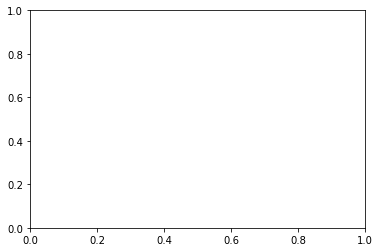

In [58]:
import matplotlib.pyplot as plt
plt.hist(profile_df['follower_count'])